## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from collections import OrderedDict
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

## Loading the dataset

In [5]:
water = pd.read_csv('water_potability.csv')

In [6]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


- Here, we have the first 5 rows of the given dataset to have a look at it and understand it. We are going to predict the 'Potability' so it will become the target and rest columns are the features!

In [8]:
water.shape

(3276, 10)

- Here we have 3276 rows and 10 columns in the Dataset

In [10]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Understanding the dataset in a statistical way

In [12]:
water.describe(include=  'all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
# checking for missing values 

water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- There are too many null values, rather than removing them, it would be more logical to add their medians instead of the null values ​​for this data set.

In [15]:
water.fillna(water.median(), inplace=True)
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
#Checking for duplicate

water.duplicated().sum()

0

## Checking for Outliers

In [18]:
# Identifying the outliers using the IQR manual method
def manual_iqr(water):
    Q1 = water.quantile(0.25)
    Q3 = water.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = ((water < lower_bound) | (water > upper_bound)).any(axis=1)
    return water[outliers_iqr]

# identify outliers using manual method
water_outliers_iqr = manual_iqr(water.select_dtypes(include='number'))
print("Number of outliers detected using manual IQR method: ",
water_outliers_iqr.shape[0])

# Display outliers 
print("outliers detected using manual IQR method: ")
print(water_outliers_iqr)

Number of outliers detected using manual IQR method:  610
outliers detected using manual IQR method: 
             ph    Hardness        Solids  Chloramines     Sulfate  \
1      3.716080  129.422921  18630.057858     6.635246  333.073546   
9     11.180284  227.231469  25484.508491     9.077200  404.041635   
18     8.975464  279.357167  19460.398131     6.204321  333.073546   
26     3.445062  207.926260  33424.768678     8.782147  384.007006   
32    10.433291  117.791230  22326.892046     8.161505  307.707509   
...         ...         ...           ...          ...         ...   
3246  10.667364  173.381945  28912.202201     7.071294  276.634391   
3249  10.808157  198.596751  29614.348790     5.782418  304.622061   
3261   3.629922  244.187392  24856.633209     6.618071  366.967873   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turb

### Outliers detected is almost about 610, Let try to Visualize them an see

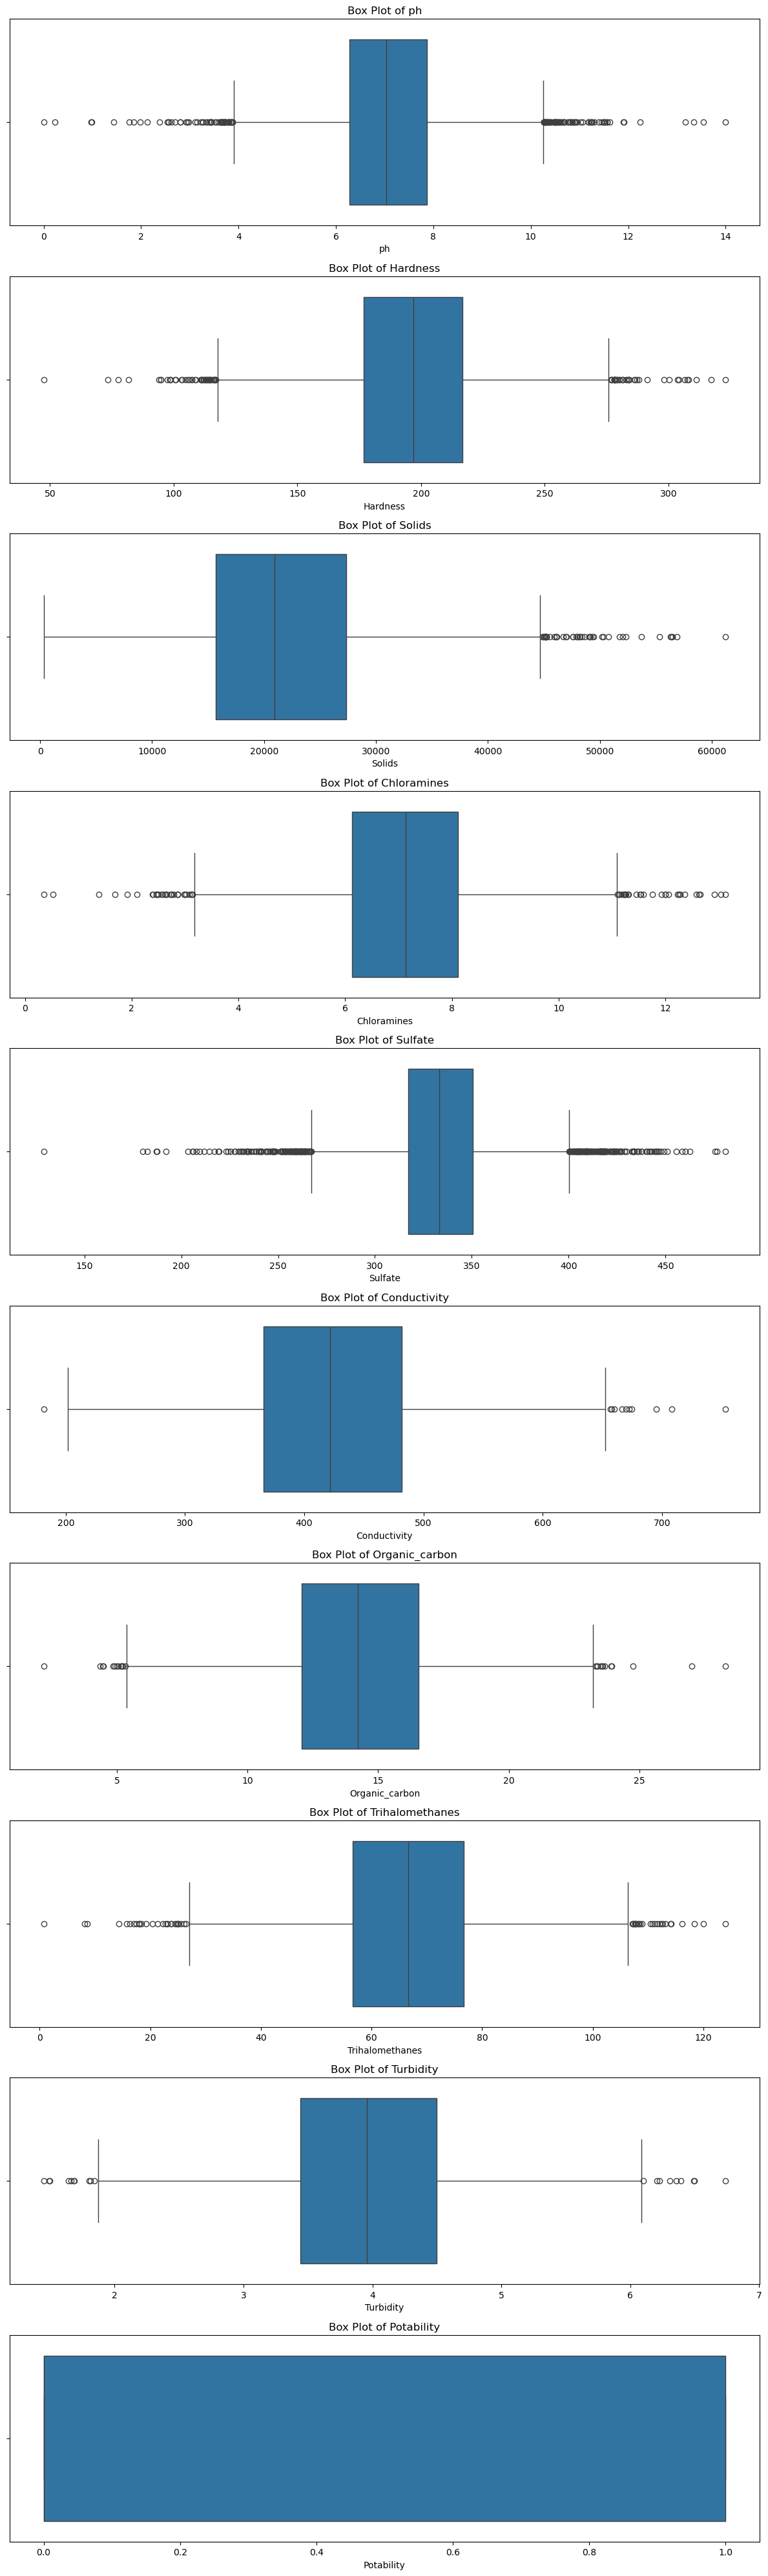

In [20]:
# Select only numerical columns
numerical_columns = water.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
plt.figure(figsize=(12, len(numerical_columns) * 4))  # Adjust figure size dynamically

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Create subplots for each column
    sns.boxplot(x=water[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [21]:
# Function to identify and handle outliers for numerical columns
def handle_numerical_outliers(water, column):
    Q1 = water[column].quantile(0.25)
    Q3 = water[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    water[column] = water[column].clip(lower=lower_bound, upper=upper_bound)

# Function to handle outliers for categorical columns
def handle_categorical_outliers(water, column):
    # Find the top categories
    top_categories = water[column].value_counts().nlargest(10).index
    
    # Replace rare categories with 'Other'
    water[column] = water[column].apply(lambda x: x if x in top_categories else 'Other')

# Apply the functions to each column in the dataframe using a for loop
for col in water.columns:
    if water[col].dtype in ['int64', 'float64']:  # Numeric columns
        handle_numerical_outliers(water, col)
    elif health[col].dtype == 'object':  # Categorical columns
        handle_categorical_outliers(water, col)

#### We have rmove all the outliers

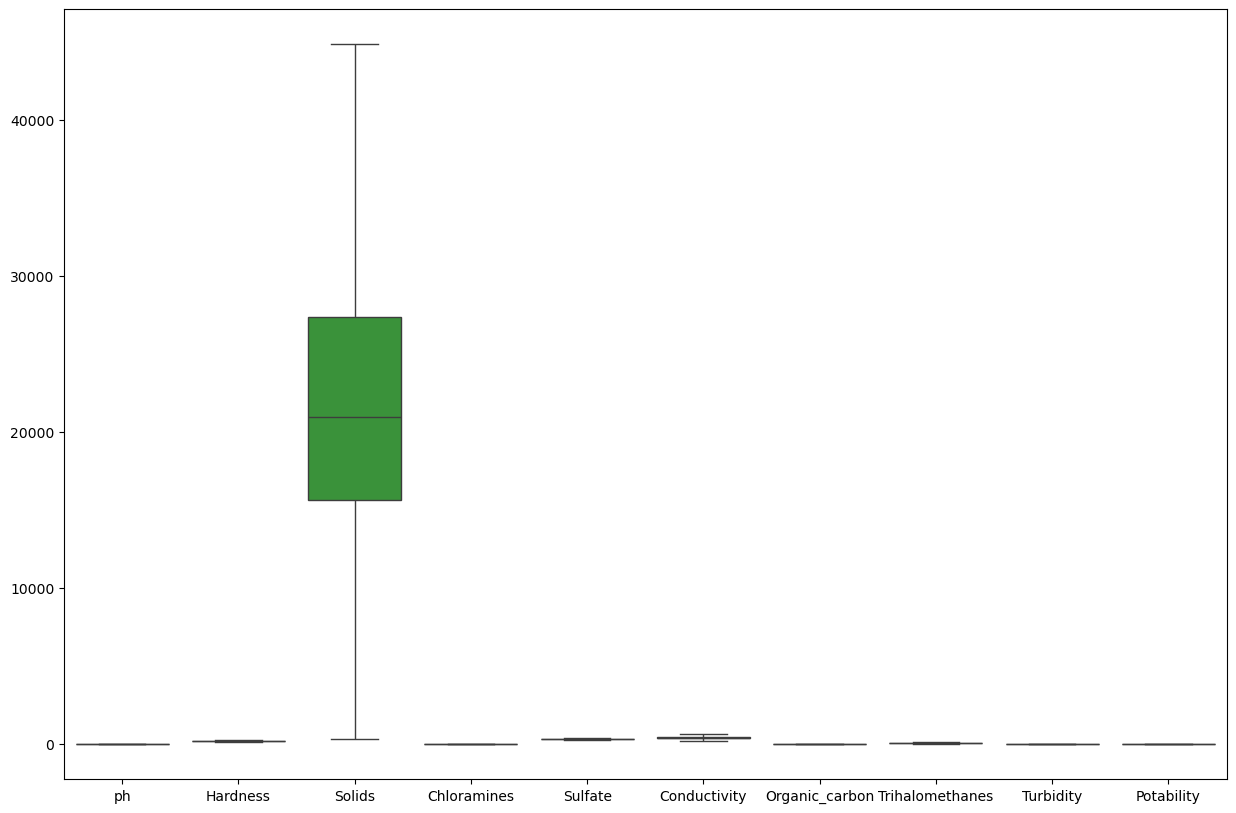

In [23]:
# Using the boxplot to visualize the presence or absence of outliers in the dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=water)
plt.show()

## Data Visualiziation & Distribution Analysis

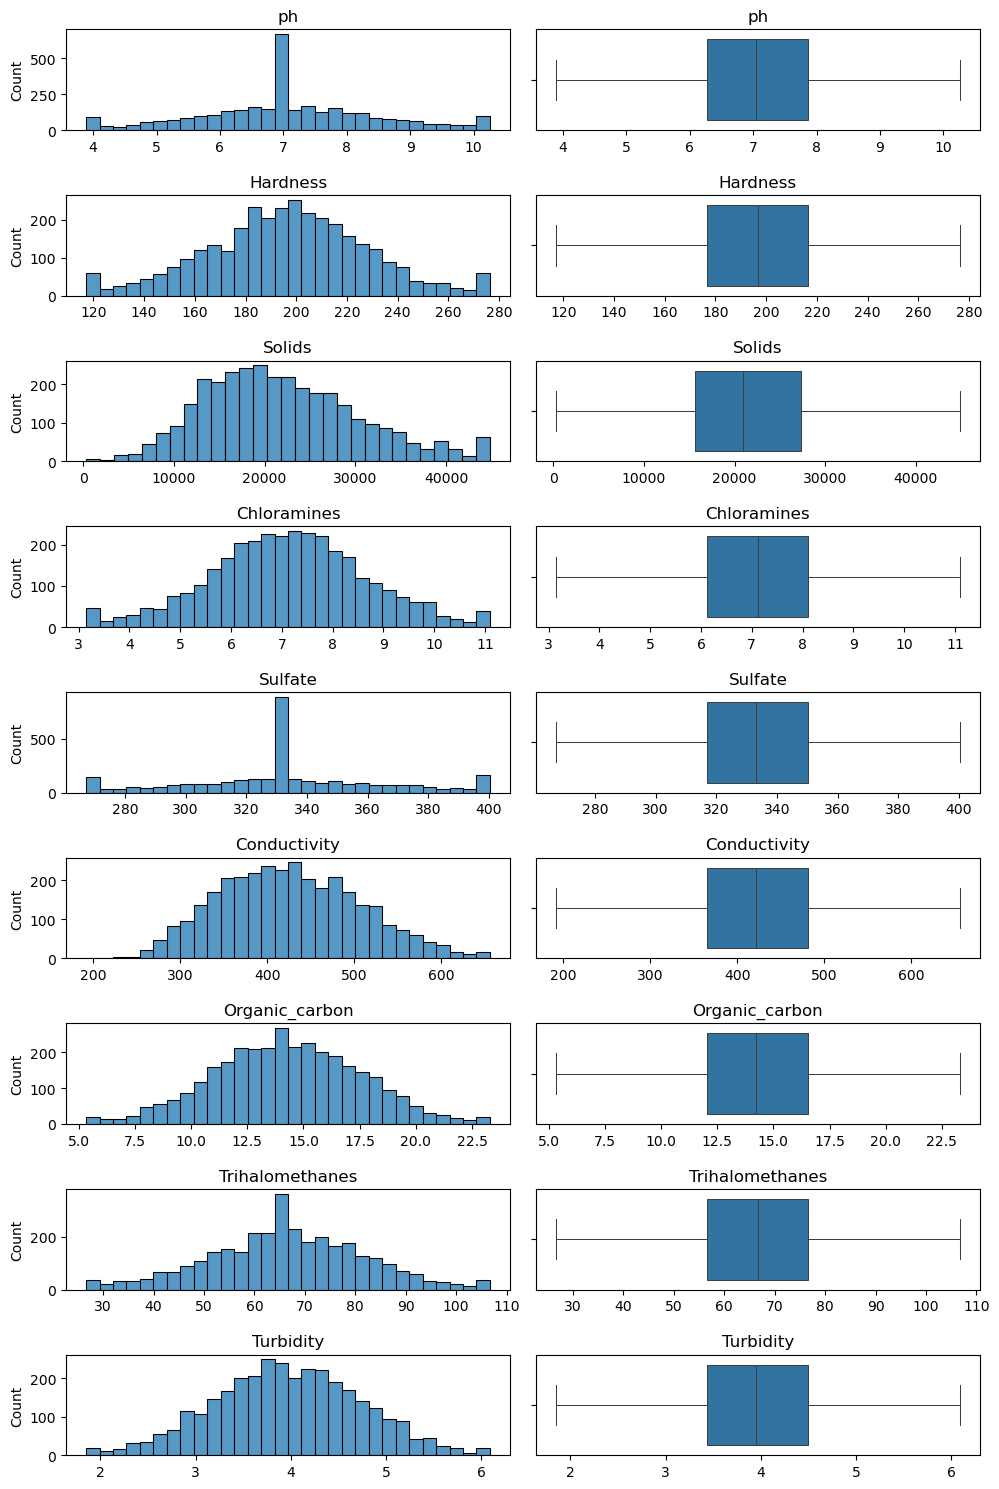

In [25]:
# Create subplot grid
fig, axes = plt.subplots(9, 2, figsize=(10, 15))

# Plot histogram & boxplot for each feature
for idx, col in enumerate(water.columns[:-1]):
    # Histogram
    sns.histplot(data=water, x=col, ax=axes[idx,0])
    axes[idx,0].set_title(col)
    axes[idx,0].set_xlabel("")

    # Boxplot
    sns.boxplot(data=water, x=col, ax=axes[idx,1], orient='h', linewidth=.75)
    axes[idx,1].set_title(col)
    axes[idx,1].set_xlabel("")

# Adjust layout
plt.tight_layout(h_pad=1.5, w_pad=1.5)
plt.show()

## Considerations on Feature Distributions
#### 1. Distribution patterns:
- Most features follow approximately normal distribution.
- Solids, Organic_carbon, and Conductivity display notable right skewness.
#### 2. Outliers presence:
- All features containing outliers are all remove.
#### 3. Scale differences:
- Features operate on vastly different scales (e.g., Solids ~20000 vs pH ~7)

## Checking for Dataset Balance

Potability
0    1998
1    1278
Name: count, dtype: int64


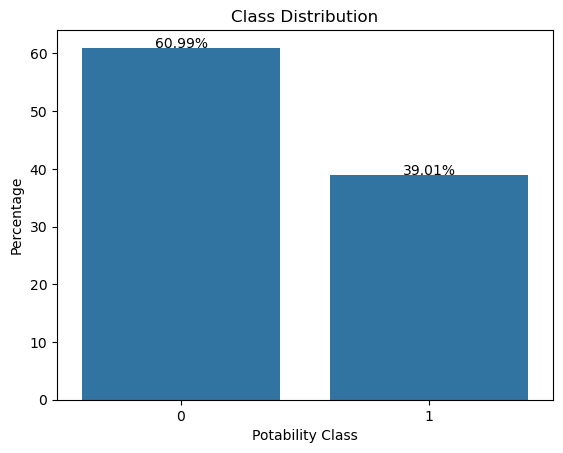

In [28]:
print(water['Potability'].value_counts())

# Calculate class distribution in percentage
class_dist = (water['Potability'].value_counts(normalize=True) * 100).round(2)

# Create figure and axes
fig, axes = plt.subplots()
# Plot class distribution
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Class Distribution')
plt.xlabel('Potability Class')
plt.ylabel('Percentage')
for i, v in enumerate(class_dist):
   plt.text(i, v, f'{v}%', ha='center')
plt.show()

### Considerations on Class Distribution
- There is significant class imbalance present in the target variable distribution (~20% difference).
- This imbalance is actually expected in real-world water quality data, as water is more often unsafe than safe in untreated samples.
- We will use SMOTE to balance when developing our model

## Data Relationship Analysis
#### Feature Correlation Analysis (Linear Relationships)
- Assess linear relationships between features to identify dependencies and enhance understanding of water quality parameters.
- Heatmap

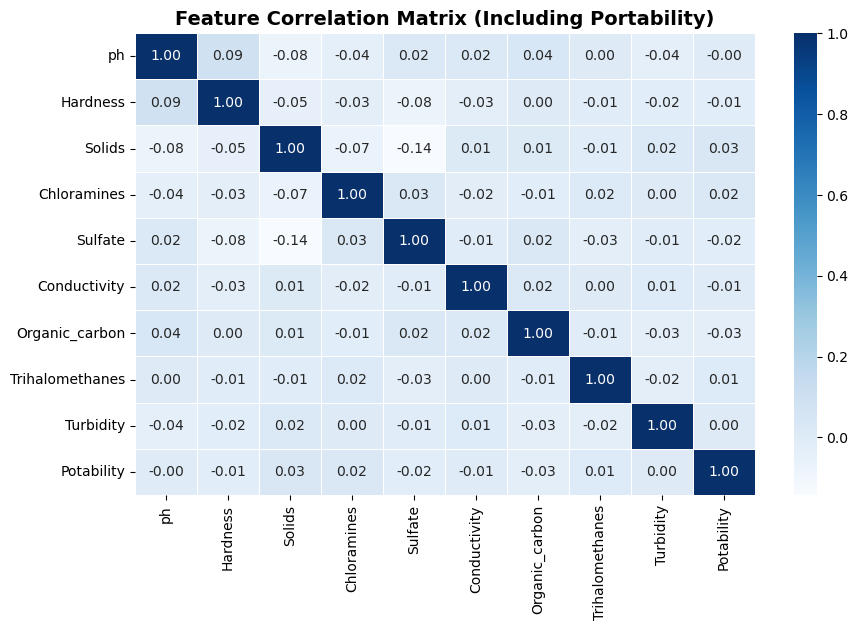

Correlation with Portability:
 Potability         1.000000
Solids             0.031847
Chloramines        0.023523
Trihalomethanes    0.006818
Turbidity          0.001597
ph                -0.001683
Conductivity      -0.007881
Hardness          -0.013360
Sulfate           -0.015506
Organic_carbon    -0.029282
Name: Potability, dtype: float64


In [31]:
# Compute the correlation matrix
correlation_matrix = water.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix (Including Portability)', fontsize=14, fontweight='bold')
plt.show()

# Display the correlation values with Portability
print("Correlation with Portability:\n", correlation_matrix['Potability'].sort_values(ascending=False))

## Observation
- The correlation matrix reveals that most water quality parameters have weak or no linear correlation with each other, suggesting that each feature contributes independently to water portability. However, the strong correlation (1.00) between Trihalomethanes and Turbidity suggests redundancy, which could impact model performance. Given the overall low correlation values, a non-linear model such as Random Forest or XGBoost may be more effective for predicting water portability rather than simple linear regression.

## Correlation Analysis
- The correlation heatmap (Fig. 1) reveals that most features, such as pH (r = -0.008) and Hardness (r = -0.014), have negligible linear relationships with Potability. The strongest correlations are:

- Solids (r = 0.034): Slightly higher solids may indicate potability.

- Organic_carbon (r = -0.030): Higher organic content weakly correlates with non-potable water.

Given the absence of strong linear trends, we will proceed with ensemble models (Random Forest) that can leverage non-linear feature interactions.

## Visualizing the relationship with other columns and portability (Target)¶

C:\Users\hp\AppData\Local\Temp\ipykernel_16372\1318806823.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=water, x=feature, hue='Potability', fill=True, alpha=0.5)


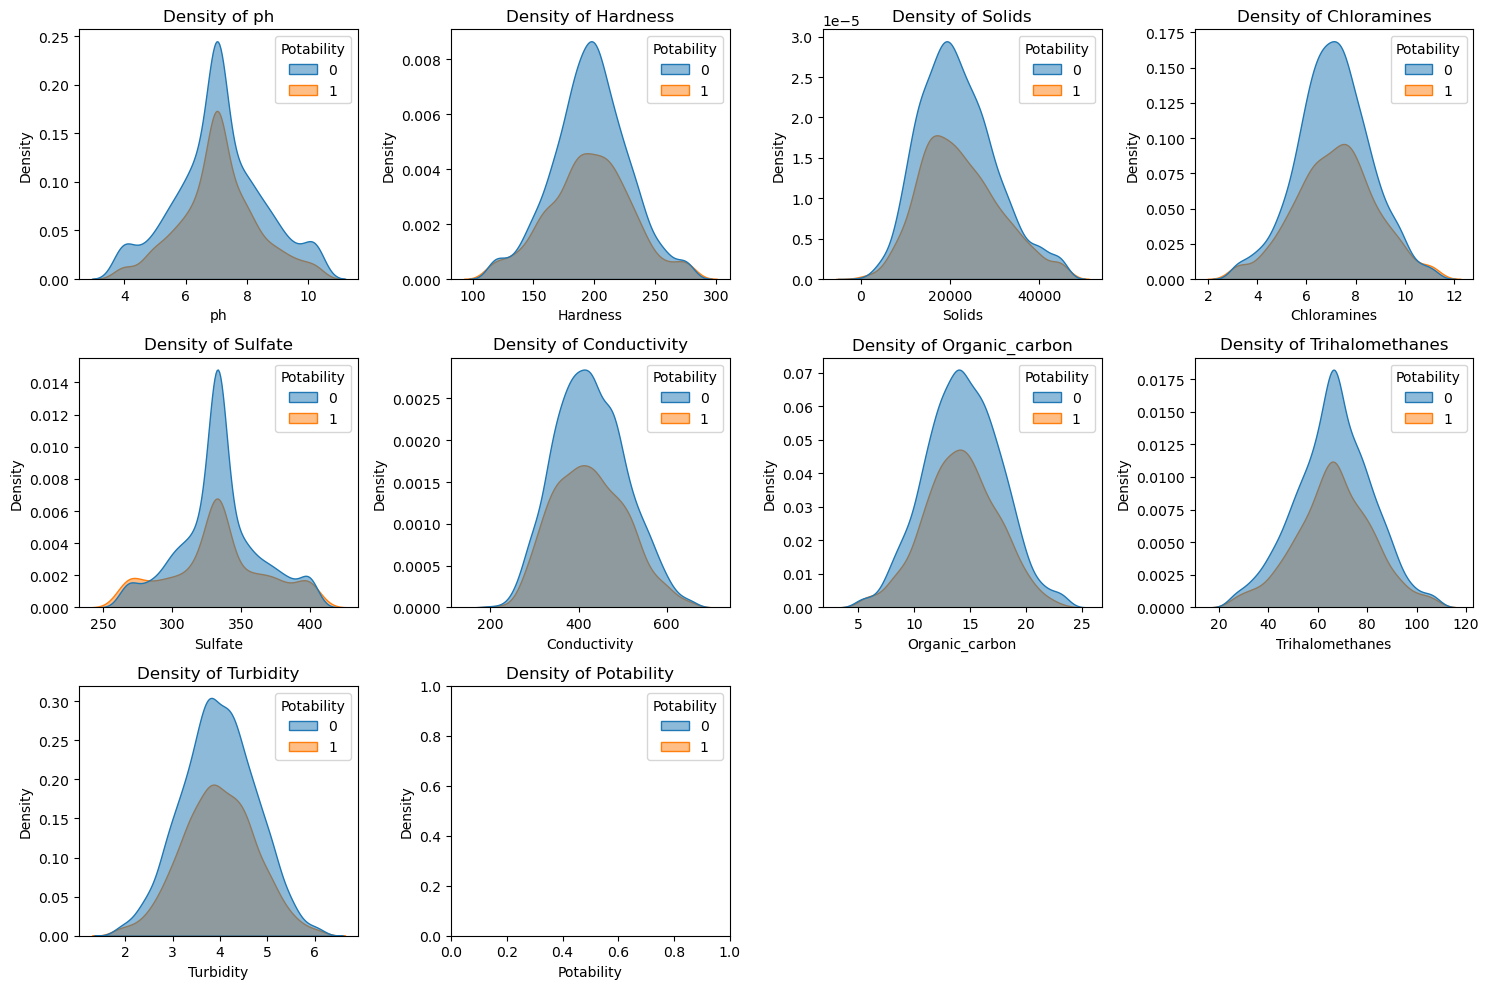

In [35]:
# Assuming 'wa' is your DataFrame and 'Potability' is the target variable
numerical_features = water.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(data=water, x=feature, hue='Potability', fill=True, alpha=0.5)
    plt.title(f"Density of {feature}")
plt.tight_layout()
plt.show()

- Some features like pH, Solids, Conductivity, and Organic Carbon show clear differences between potable and non-potable water, meaning they could be important in a predictive model.

- Other features like Hardness, Sulfates, and Turbidity have similar distributions, meaning they may have a weaker correlation with potability.

- This analysis helps in feature selection, allowing us to determine which water quality parameters contribute most to predicting water potability.

C:\Users\hp\AppData\Local\Temp\ipykernel_16372\1189580000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


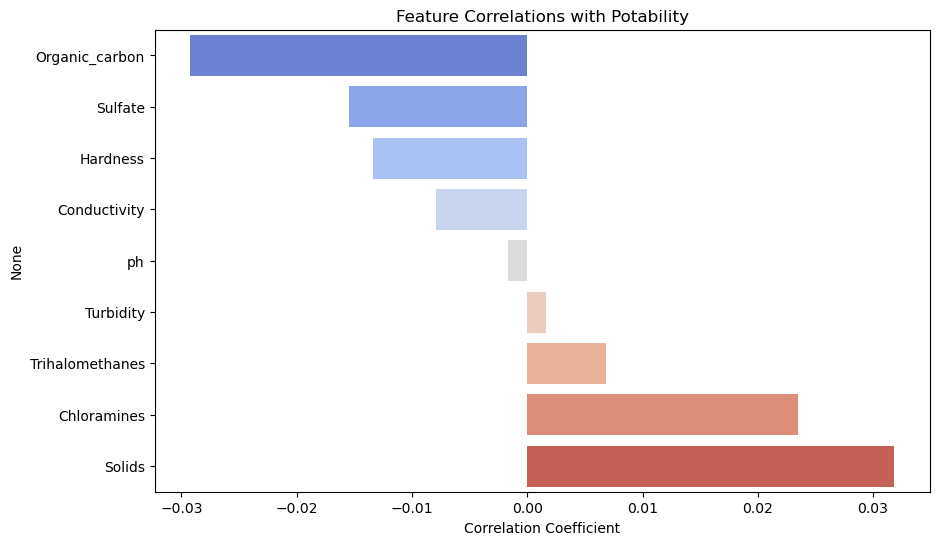

In [37]:
# Calculate correlations with Potability
correlations = water.corr()['Potability'].drop('Potability').sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Feature Correlations with Potability")
plt.xlabel("Correlation Coefficient")
plt.show()

## Feature Correlations with Potability: Analysis & Insights
- This bar plot represents the correlation between different water quality parameters and the target variable Potability.
### Key Observations
#### Negative Correlations (Blue Bars)
- Organic Carbon has the strongest negative correlation with potability. Higher organic carbon levels might be linked to contamination, making water non-potable.
- Sulfate, Hardness, and Conductivity also show weak negative correlations, indicating that an increase in these factors may slightly reduce water potability.
##### Positive Correlations (Red Bars)
- Solids and Chloramines have the highest positive correlation, meaning higher levels of these factors may be slightly associated with potable water.
- Turbidity and Trihalomethanes show weak positive correlations, suggesting that these variables might contribute to potability classification but not strongly.
## Insights
### ✅ Feature Importance
- Since all correlations are relatively weak, using machine learning models (e.g., Random Forest, XGBoost) with feature importance analysis might be better for identifying significant predictors.
- Scaling or normalizing features might help improve model performance.

## Let Save the Clean Dataset

In [40]:
water.to_csv("Cleaned water_potability.csv", index = False)

## Loading the Cleaned dataset

In [42]:
import pandas as pd
data=pd.read_csv('Cleaned water_potability.csv')
data.info()
data.describe()
data.head()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.073546,327.459760,16.140368,78.698446,2.309149,1


# Model Development

### Spliting the dataset to test and train for proper prediction

In [45]:
X = data.drop(columns=['Potability'])  # Features
y = data['Potability']  # Target variable

# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

# Checking the shape of the sets
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (2948, 9), (2948,)
Testing set size: (328, 9), (328,)


In [46]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Auto-calculate class weights
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train
model = LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    boosting_type='goss',  # Better for small/medium data
    random_state=42
)
model.fit(X_train, y_train)  # Removed non-breaking space


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -

LGBMClassifier(boosting_type='goss', random_state=42,
               scale_pos_weight=1.563600782778865)

## Scaling The dataset for a better prediction

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to resample training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=SVC()
)

# Train and test
stacking_model.fit(X_train_resampled, y_train_resampled)
test_accuracy = stacking_model.score(X_test, y_test)
print("Stacking Model Accuracy:", test_accuracy)


Stacking Model Accuracy: 0.663109756097561


## Standard Scaker Model

In [65]:
#Scale the input features
scale = StandardScaler()

In [67]:
X_trains = scale.fit_transform(X_train)

In [69]:
X_tests = scale.transform(X_test)

In [71]:
support = SVC()

In [73]:
support.fit(X_trains, y_train)

SVC()

In [75]:
support.predict(X_trains)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
support.score(X_trains, y_train)

0.731679389312977

### Accuracy for Train = 73%

In [79]:
support.predict(X_tests)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [82]:
support.score(X_tests,y_test)

0.6890243902439024

### Accuracy for Test = 68%

## KNeighborsClassifier Model

In [86]:
knn = KNeighborsClassifier()

In [88]:
knn.fit(X_trains, y_train)

KNeighborsClassifier()

In [90]:
knn.score(X_trains, y_train)

0.7541984732824427

### Accuracy for Train = 75% 
- Just a small improvent

In [93]:
knn.score(X_tests, y_test)

0.635670731707317

### Accuracy For Test = 63%

## DecisionTressClassifier Model

In [97]:
dtc = DecisionTreeClassifier()

In [99]:
dtc.fit(X_trains, y_train)

DecisionTreeClassifier()

In [101]:
dtc.score(X_tests, y_test)

0.600609756097561

### Accuracy for Test = 60%

In [104]:
dtc.score(X_trains, y_train)

1.0

### Accuracy for Train = 100%
- A very good improvement ion the model

## RandomeForestClassifier

In [108]:
rfc = RandomForestClassifier()

In [110]:
rfc.fit(X_trains, y_train)

RandomForestClassifier()

In [111]:
rfc.score(X_trains, y_train)

1.0

### Accuracy for Train = 100%

In [115]:
rfc.score(X_tests, y_test)

0.6661585365853658

### Accuracy for Test = 66%

# Confussion Matrix of Random Forest

C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


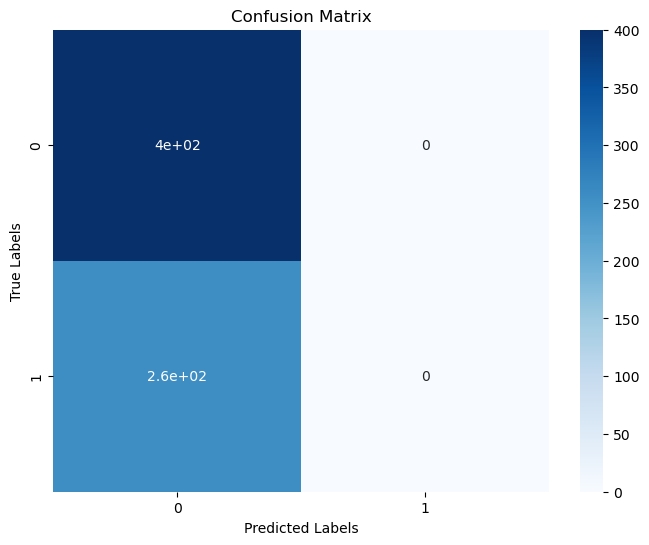

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

rfc.fit(X_train_resampled, y_train_resampled)
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Load data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# Split data (fix random_state)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models (all with random_state where applicable)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()  # No random_state
}

# Store results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train F1': [],
    'Test F1': []
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store metrics
    results['Model'].append(name)
    results['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
    results['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
    results['Train F1'].append(f1_score(y_train, y_train_pred, average='weighted'))
    results['Test F1'].append(f1_score(y_test, y_test_pred, average='weighted'))

results_data = pd.DataFrame(results)
print(results_data.round(2))

           Model  Train Accuracy  Test Accuracy  Train F1  Test F1
0  Decision Tree            1.00           0.58      1.00     0.58
1  Random Forest            1.00           0.66      1.00     0.63
2            SVC            0.74           0.66      0.72     0.62
3            KNN            0.76           0.61      0.76     0.59


## After traning and testing ourmodel by using 4 classification to get our predicting Accuracy,
- ### Random_Forest comes out with the best train & test value (Train = 100%, Test = 66%)

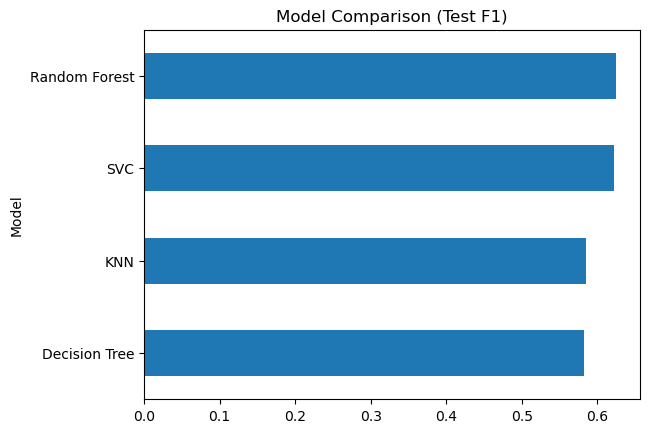

In [121]:
import matplotlib.pyplot as plt

# Plot Test F1 scores
results_data.sort_values('Test F1').plot(
    x='Model', y='Test F1', kind='barh', 
    title='Model Comparison (Test F1)', 
    legend=False
)
plt.show()

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual results_df)
data = {
    'Model': ['Decision Tree', 'Random Forest', 'SVC', 'KNN'],
    'Train Accuracy': [1.00, 1.00, 0.74, 0.76],
    'Test Accuracy': [0.58, 0.66, 0.66, 0.61],
    'Train F1': [1.00, 1.00, 0.72, 0.76],
    'Test F1': [0.58, 0.63, 0.62, 0.59]
}
results_data = pd.DataFrame(data)

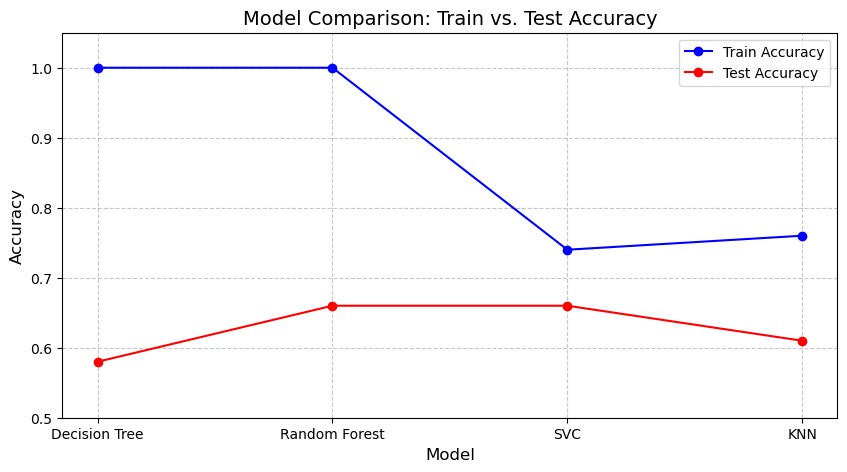

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(results_data['Model'], results_data['Train Accuracy'], marker='o', label='Train Accuracy', color='blue')
plt.plot(results_data['Model'], results_data['Test Accuracy'], marker='o', label='Test Accuracy', color='red')

plt.title('Model Comparison: Train vs. Test Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.5, 1.05)  # Adjust y-axis range
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## This visualiziation shows that our best predicting value is "Random_Forest". so we are going to work with it 

## Saving the Best Model (Random_Forest)

In [129]:
import joblib

# Assuming 'rf_model' is your trained Random Forest Classifier
joblib.dump(rfc, "Water_quality_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# Creating a web page that can interact with user for proper prediction


In [1]:
import tkinter as tk
from tkinter import messagebox
import joblib
import pandas as pd

# Load the trained model
try:
    model = joblib.load("Water_quality_model.pkl")
except Exception as e:
    messagebox.showerror("Model Error", f"Failed to load model: {e}")

# Function to make prediction
def predict_water_quality():
    try:
        inputs = []
        for entry in entries:
            inputs.append(float(entry.get()))
        
        input_data = pd.DataFrame([inputs], columns=["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"])
        
        prediction = model.predict(input_data)
        result = "Water is Portable" if prediction[0] == 1 else "Water is Not Portable"
        
        # Change color based on prediction
        if prediction[0] == 1:
            result_label.config(text=f"Water Quality: {result}", fg="#008000")  # Green
        else:
            result_label.config(text=f"Water Quality: {result}", fg="#FF0000")  # Red
    
    except Exception as e:
        messagebox.showerror("Prediction Error", f"Error making prediction: {e}")

# Create main GUI window
root = tk.Tk()
root.title("Water Quality Prediction")
root.geometry("400x500")
root.configure(bg="#FFFF00")  # Yellow background

# Title Label
tk.Label(root, text="Water Quality Prediction", font=("Arial", 16, "bold"), bg="#FFFF00").pack(pady=10)

# Frame for Inputs
frame = tk.Frame(root, bg="#FFFF00")
frame.pack(pady=10)

# Labels and Entry Fields
feature_names = ["pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic Carbon", "Trihalomethanes", "Turbidity"]
entries = []
for i, feature in enumerate(feature_names):
    tk.Label(frame, text=f"{feature}:", font=("Arial", 12), bg="#FFFF00").grid(row=i, column=0, padx=10, pady=5, sticky="w")
    entry = tk.Entry(frame, font=("Arial", 12))
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Predict Button
tk.Button(root, text="Predict", font=("Arial", 14, "bold"), command=predict_water_quality, bg="#32CD32", fg="white").pack(pady=20)

# Result Label
result_label = tk.Label(root, text="", font=("Arial", 14, "bold"), bg="#FFFF00")
result_label.pack(pady=10)

# Run the GUI
root.mainloop()


# The #FFFF00 hex code represents the color yellow. I've applied this color to the background of the GUI window, title label, input frame, and result label.

C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without featu